In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Cargamos un DataFrame
tips = sns.load_dataset("tips")

#Mostrar
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


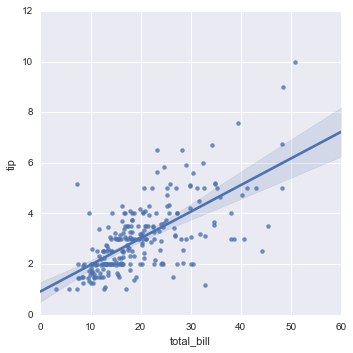

In [3]:
#Usemo lmplot() para graficar total bill contra tips
sns.lmplot("total_bill","tip",tips)

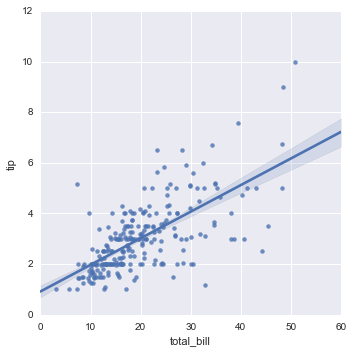

In [4]:
#Podemos establecer el intervalo de confianza que usara la linea de ajuste
sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci 

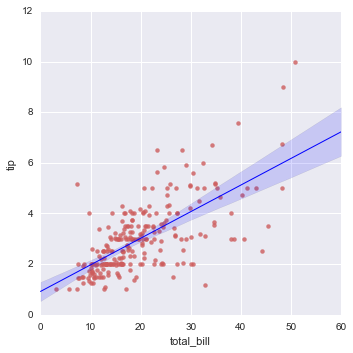

In [5]:
#Podemos usar diccionarios para editar partes particulares de la grafica
sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

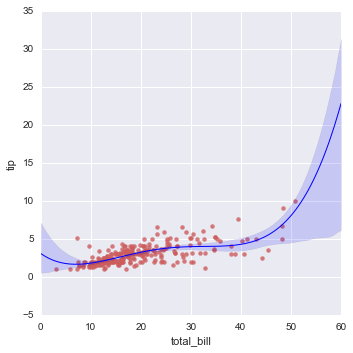

In [6]:
#Tambien podemos observar las tendencias de orden alto
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

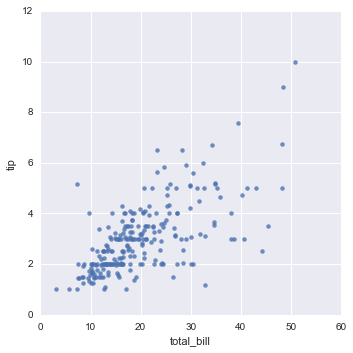

In [7]:
#Podemos elegir no ajustar la regresion
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

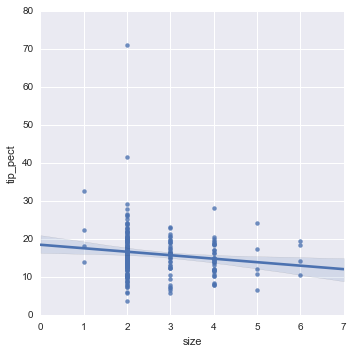

In [8]:
# lmplot() tambien puede trabajar con variables discretas, como con porcentajes

#Creamos una nueva columna para el porcentaje de la propina
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#Mostrar
sns.lmplot("size", "tip_pect", tips);

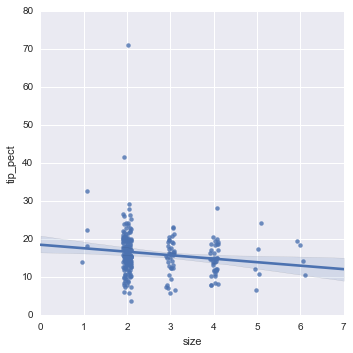

In [9]:
#Podemos agregar jitter

#Informacion
url = "http://en.wikipedia.org/wiki/Jitter"

#Graficar
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

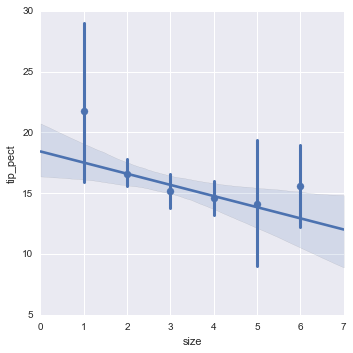

In [10]:
#Podemos estimar la tendencia de cada rango
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

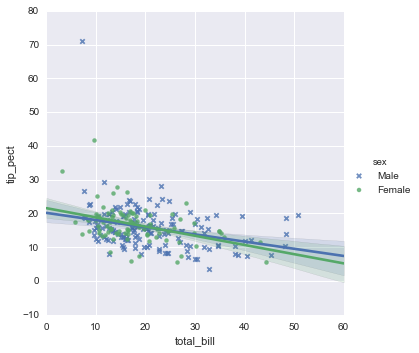

In [11]:
#Podemos usar la faceta de matiz para definir sub conjuntos automaticamente
#Graficamos
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

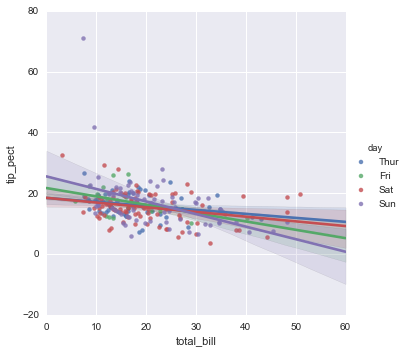

In [12]:
#El dia hace diferencia?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

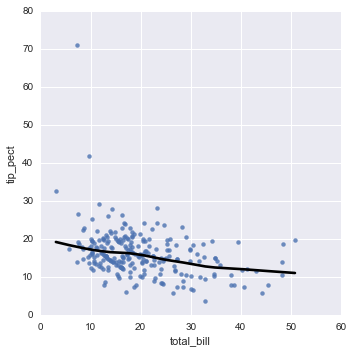

In [13]:
#Seabron soporta ajuste LOESS
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

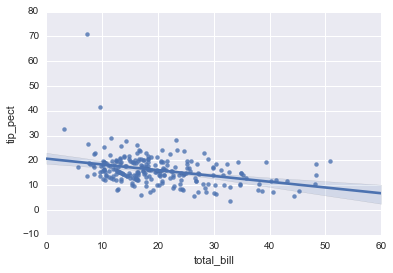

In [14]:
#lmplot() usa una fucnion de bajo nivel, regplot()
sns.regplot("total_bill","tip_pect",tips)

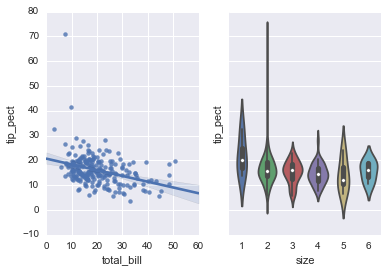

In [18]:
# Crear figura con 2 subgraficas
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(y=tips['tip_pect'],x=tips['size'],ax=axis2)